In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import pandas as pd
import os
import cv2

## Part 1: Data Preprocessing

### Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 設定資料路徑
# training data path
trcloudy='/content/drive/MyDrive/碩一下學期/電腦視覺/2023-ee-hw2/weather_image/train/cloudy/'
trrain='/content/drive/MyDrive/碩一下學期/電腦視覺/2023-ee-hw2/weather_image/train/rain/'
trshine='/content/drive/MyDrive/碩一下學期/電腦視覺/2023-ee-hw2/weather_image/train/shine/'
trsunrise='/content/drive/MyDrive/碩一下學期/電腦視覺/2023-ee-hw2/weather_image/train/sunrise/'
# testing data path
testpath='/content/drive/MyDrive/碩一下學期/電腦視覺/2023-ee-hw2/weather_image/test/'

In [4]:
# 顯示資料筆數
print('train cloudy length: ',len(os.listdir(trcloudy)))
print('train rain length: ',len(os.listdir(trrain)))
print('train shine length: ',len(os.listdir(trshine)))
print('train sunrise length: ',len(os.listdir(trsunrise)))
print('\n')
print('test data length: ',len(os.listdir(testpath)))

train cloudy length:  280
train rain length:  199
train shine length:  232
train sunrise length:  337


test data length:  75


### convert image data to numpy

In [5]:
# convert the train data to numpy
tr_label=list()
tr_data=np.empty(shape=(1048,250,250,3))
x=0
for i in range(len(os.listdir(trcloudy))):
  f=os.listdir(trcloudy)[i]
  img=cv2.imread(trcloudy+f)
  img=cv2.resize(img,(250,250))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(0)
  x+=1
for i in range(len(os.listdir(trrain))):
  f=os.listdir(trrain)[i]
  img=cv2.imread(trrain+f)
  img=cv2.resize(img,(250,250))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(1)
  x+=1
for i in range(len(os.listdir(trshine))):
  f=os.listdir(trshine)[i]
  img=cv2.imread(trshine+f)
  img=cv2.resize(img,(250,250))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(2)
  x+=1
for i in range(len(os.listdir(trsunrise))):
  f=os.listdir(trsunrise)[i]
  img=cv2.imread(trsunrise+f)
  img=cv2.resize(img,(250,250))
  img=img[:,:,::-1]/255
  tr_data[x]=img
  tr_label.append(3)
  x+=1

tr_label=np.array(tr_label)

In [6]:
# convert the test data to numpy
te_filename=list()
te_data=np.empty(shape=(75,250,250,3))
for i in range(len(os.listdir(testpath))):
  f=os.listdir(testpath)[i]
  te_filename.append(f)
  img=cv2.imread(testpath+f)
  img=cv2.resize(img,(250,250))
  img=img[:,:,::-1]/255
  te_data[i]=img

In [7]:
# show data size
print('train data size:',tr_data.shape)
print('train label size:',len(tr_label))
print('test data size:',te_data.shape)

train data size: (1048, 250, 250, 3)
train label size: 1048
test data size: (75, 250, 250, 3)


### shuffle

In [8]:
# on-hot label
from tensorflow.keras.utils import to_categorical
tr_label=to_categorical(tr_label)
# 打亂資料順序
from sklearn.utils import shuffle
tr_data,tr_label=shuffle(tr_data,tr_label,random_state=0)

### train_validation data split

In [9]:
# train_validation data split
#val_data數量固定262個
train_data=tr_data[0:786]
val_data=tr_data[786:]
train_label=tr_label[0:786]
val_label=tr_label[786:]
print('train data size: ',train_data.shape)
print('validation data size: ',val_data.shape)
print('train label size: ',train_label.shape)
print('validation label size: ',val_label.shape)

train data size:  (786, 250, 250, 3)
validation data size:  (262, 250, 250, 3)
train label size:  (786, 4)
validation label size:  (262, 4)


## Part 2: Build a simple CNN

In [10]:
# # define model
# cnn=models.Sequential() # name the network
# # feature extraction
# cnn.add(layers.Conv2D(filters=32,kernel_size=(3,3), input_shape=(300,300,3),activation='relu',padding='same'))
# cnn.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
# cnn.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
# cnn.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
# cnn.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
# cnn.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
# cnn.add(layers.Flatten())
# # neron network
# cnn.add(layers.Dense(units=64,activation='relu'))
# cnn.add(layers.Dense(units=32,activation='relu'))
# cnn.add(layers.Dense(units=4,activation='softmax'))
# # show the model structure
# cnn.summary()
initializer=tf.keras.initializers.he_uniform(seed=200)
chanDim = -1
cnn=models.Sequential() # name the network
#BLOCK 1
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'same', input_shape = (250,250,3), kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.Activation("relu"))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))

#BLOCK 2
cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#BLOCK 3
cnn.add(layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#BLOCK 4 
cnn.add(layers.Conv2D(filters = 256, kernel_size = (5,5),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.Conv2D(filters = 256, kernel_size = (5,5),padding = 'same',kernel_initializer=initializer))
cnn.add(layers.BatchNormalization(axis=chanDim))
cnn.add(layers.Activation("relu"))
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Classifier
cnn.add(layers.GlobalAveragePooling2D())
cnn.add(layers.Dense(512, activation = "relu",kernel_initializer=initializer))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(128, activation = "relu",kernel_initializer=initializer))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(4, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 250, 250, 32)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 32)     128       
 hNormalization)                                        

In [11]:
# comiple model
cnn.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
# datagen = ImageDataGenerator(#rescale = 1./255,
#                   shear_range = 0.2,
#                   zoom_range = 0.2,
#                   horizontal_flip = True,
#                   width_shift_range=0.2,
#                   height_shift_range=0.2,
#                   rotation_range=15,
#                   fill_mode="reflect")
# # ,
# #                   fill_mode='reflect',
# #                   data_format='channels_last',
# #                   brightness_range=[0.5, 1.5]

In [13]:
from keras.callbacks import ReduceLROnPlateau
LR_function=ReduceLROnPlateau(monitor='val_accuracy',
               patience=5,
               # 3 epochs 內acc沒下降就要調整LR
               verbose=1,
               factor=0.5,
               # LR降為0.5
               min_lr=0.00001
               # 最小 LR 到0.00001就不再下降
               )
#LR_function = ReduceLROnPlateau(monitor='val_acc',factor=0.1,patience=5,min_lr=1e-30,cooldown=3,verbose=1)

In [14]:
#history = cnn.fit(train_data, train_label,batch_size=10 ,epochs=3,validation_split=0.3)
history = cnn.fit_generator(datagen.flow(train_data, train_label, batch_size=10), validation_data=datagen.flow(val_data, val_label, batch_size=10), epochs=100, callbacks=[LR_function])
#history = cnn.fit_generator(datagen.flow(train_data, train_label, batch_size=10), validation_data=(val_data, val_label), epochs=100, callbacks=[LR_function])

<ipython-input-14-936e60078d02>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(datagen.flow(train_data, train_label, batch_size=10), validation_data=datagen.flow(val_data, val_label, batch_size=10), epochs=100, callbacks=[LR_function])


Epoch 1/100
79/79 [==============================] - 41s 257ms/step - loss: 1.1204 - accuracy: 0.5992 - val_loss: 1.0864 - val_accuracy: 0.6794 - lr: 0.0010
Epoch 2/100
79/79 [==============================] - 16s 205ms/step - loss: 0.7679 - accuracy: 0.7608 - val_loss: 0.6886 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 3/100
79/79 [==============================] - 16s 206ms/step - loss: 0.6990 - accuracy: 0.7545 - val_loss: 0.7481 - val_accuracy: 0.7710 - lr: 0.0010
Epoch 4/100
79/79 [==============================] - 16s 202ms/step - loss: 0.6093 - accuracy: 0.7824 - val_loss: 0.4720 - val_accuracy: 0.8397 - lr: 0.0010
Epoch 5/100
79/79 [==============================] - 16s 208ms/step - loss: 0.6566 - accuracy: 0.7812 - val_loss: 0.5708 - val_accuracy: 0.7939 - lr: 0.0010
Epoch 6/100
79/79 [==============================] - 16s 205ms/step - loss: 0.6558 - accuracy: 0.7913 - val_loss: 0.6038 - val_accuracy: 0.7519 - lr: 0.0010
Epoch 7/100
79/79 [==============================] - 18s 2

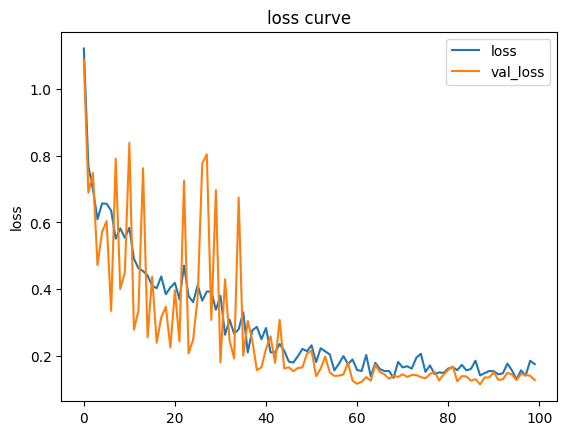

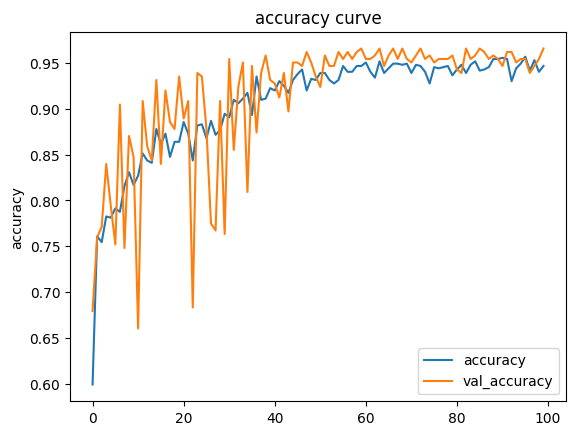

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Plot the confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
pre=cnn.predict(val_data)
pre=np.argmax(pre,axis=1)

9/9 [==============================] - 3s 61ms/step


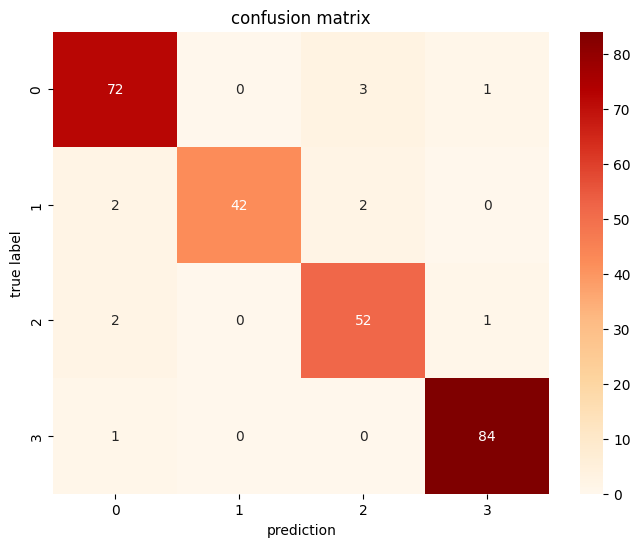

In [17]:
import seaborn as sn
cm=confusion_matrix(pre,np.argmax(val_label,axis=1))
fit=plt.figure(figsize=(8,6))
plt.title('confusion matrix')
sn.heatmap(cm,annot=True,cmap='OrRd',fmt='g')
plt.xlabel('prediction')
plt.ylabel('true label')
plt.show()

# Output the csv file

In [18]:
import pandas as pd

In [19]:
prediction=cnn.predict(te_data)
prediction=np.argmax(prediction,axis=1)
prediction

3/3 [==============================] - 1s 632ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 0, 3, 2, 3, 3, 3])

In [20]:
test_label=pd.DataFrame()
test_label['image_id']=te_filename
test_label['labels']=prediction
test_label=test_label.sort_values(by='image_id')
test_label.to_csv('/content/drive/MyDrive/碩一下學期/電腦視覺/2023-ee-hw2/weather_image/predict_label.csv',index=False) #結果轉csv檔

# Part3: Data augmentation

In [21]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

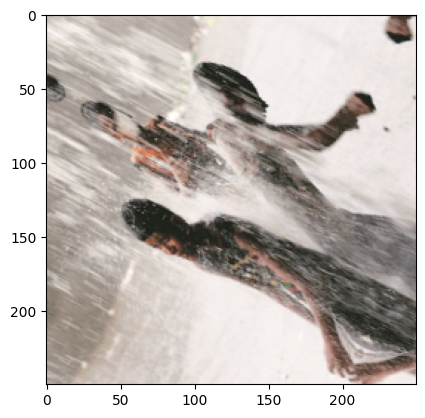

In [22]:
data=tr_data[1]
data=data_augmentation(data)
plt.imshow(data)